In [93]:
import pandas as pd

In [94]:
df = pd.read_csv('data_ibge.csv')[['Ano','Genero', 'qtd','Idade']]
df.head()

,Ano,Genero,qtd,Idade
0,2023,0,1667896,22 anos
1,2033,1,1698488,34 anos
2,2001,1,1834635,15 anos
3,2050,0,1452538,63 anos
4,2053,1,1327018,21 anos


In [95]:
df_mock = pd.DataFrame({
   'Ano': [2001, 2002, 2003, 2004],
    'Genero':[1,0,1,0],
    'qtd': [10, 19, 20, 10],
    'Idade': ['18 Anos', '19 Anos', '20 Anos', '21 Anos']
}
)

print(df_mock.dtypes)
df_mock.head()

Ano        int64
Genero     int64
qtd        int64
Idade     object
dtype: object


,Ano,Genero,qtd,Idade
0,2001,1,10,18 Anos
1,2002,0,19,19 Anos
2,2003,1,20,20 Anos
3,2004,0,10,21 Anos


In [96]:
pessoas = df_mock[['Ano', 'Genero', 'qtd']].values.tolist()
print(pessoas)
resultados = df_mock['Idade']
print(resultados)

[[2001, 1, 10], [2002, 0, 19], [2003, 1, 20], [2004, 0, 10]]
0    18 Anos
1    19 Anos
2    20 Anos
3    21 Anos
Name: Idade, dtype: object


In [97]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(pessoas, resultados) # treinando a maquina

ano = 2003 # int(input('Qual ano de referencia: '))
genero = 1 # int(input('Qual seu genero: '))
qtd = 20 # int(input('Qual a quantidade: '))

resultado_predito = clf.predict([[ano, genero,qtd]]) # Testar
print(f'A maquina acha que a pessoa tem:{resultado_predito}')

A maquina acha que a pessoa tem:['20 Anos']


In [98]:
# Homem = Cabelo Curto, fala grosso, paga as contas
homem1 = [0,1,0]
homem2 = [0,1,1]
homem3 = [1,1,0]

# Mulheres = Cabelo longo, fala fina, paga as maquiagens
mulher1 = [0,1,1]
mulher2 = [1,0,1]
mulher3 = [1,1,1]

treino_x = [homem1, homem2,homem3, mulher1, mulher2, mulher3]
treino_y = [1,1,1,0,0,0] # 0 => homem, 1 => Mulher

In [99]:
from sklearn.svm import LinearSVC

modelo = LinearSVC() # beber
modelo.fit(treino_x, treino_y) # treinar

LinearSVC()

In [100]:
pessoa1 = [0,0,0]
modelo.predict([pessoa1]) # testar

array([1])

In [101]:
# Homem = Cabelo Curto, fala grosso, paga as contas
homem1 = [0,1,0]
homem2 = [0,1,1]
homem3 = [1,1,0]

# Mulheres = Cabelo longo, fala fina, paga as maquiagens
mulher1 = [0,1,1]
mulher2 = [1,0,1]
mulher3 = [1,1,1]

In [102]:
pessoa2 = [1,0,1]
pessoa3 = [1,1,1]
pessoa4 = [0,1,0]
pessoa5 = [1,1,0]

teste_x = [pessoa2, pessoa3, pessoa4, pessoa5]
teste_y = [0,0,1,1]

previsoes = modelo.predict(teste_x) # teste
previsoes

array([0, 0, 1, 1])

In [103]:
from sklearn.metrics import accuracy_score

accuracy_score(teste_y, previsoes)

1.0

In [104]:
from numpy.random import randint

colunas = ['entraram', 'v_cardapio', 'voltaram', 'indicaram', 'compram']

dados = {}

for x in range(5000):
    dados[x] = [randint(0,2), randint(0,2), randint(0,2), randint(0,2), randint(0,2)]

dados[0]

[0, 0, 0, 1, 0]

In [105]:
df = pd.DataFrame(dados.values())
df.columns = colunas
df.head()

,entraram,v_cardapio,voltaram,indicaram,compram
0,0,0,0,1,0
1,0,1,0,0,0
2,0,1,1,1,0
3,0,0,1,0,0
4,0,0,0,0,1


In [106]:
x = df[['entraram', 'v_cardapio', 'voltaram', 'indicaram']] #.values.tolist()
y = df['compram']

In [107]:
modelo = LinearSVC()
modelo.fit(x, y) # treinar

previsoes = modelo.predict(x) # testar

accuracy_score(y, previsoes) * 100

50.580000000000005

In [108]:
from sklearn.model_selection import train_test_split  # ajuda vc separar seu dados em treino e test

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y)

print(f'x: {x.count()}')
print(f'y: {y.count()}')
print(f'treino_x: {treino_x.count()}')
print(f'treino_y: {treino_y.count()}')
print(f'teste_x: {teste_x.count()}')
print(f'teste_y: {teste_y.count()}')

x: entraram      5000
v_cardapio    5000
voltaram      5000
indicaram     5000
dtype: int64
y: 5000
treino_x: entraram      3750
v_cardapio    3750
voltaram      3750
indicaram     3750
dtype: int64
treino_y: 3750
teste_x: entraram      1250
v_cardapio    1250
voltaram      1250
indicaram     1250
dtype: int64
teste_y: 1250


In [147]:
modelo = LinearSVC()

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.1, random_state=42) # dividindo os dados

modelo.fit(treino_x, treino_y) # treinando

previsoes = modelo.predict(teste_x) # testando

accuracy_score(teste_y, previsoes) * 100

49.2

In [149]:
df1 = pd.read_csv('Advertising.csv', index_col=0)
df1.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [153]:
x = df1[['TV', 'Radio', 'Newspaper']]
y = df1['Sales']
x.head()
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

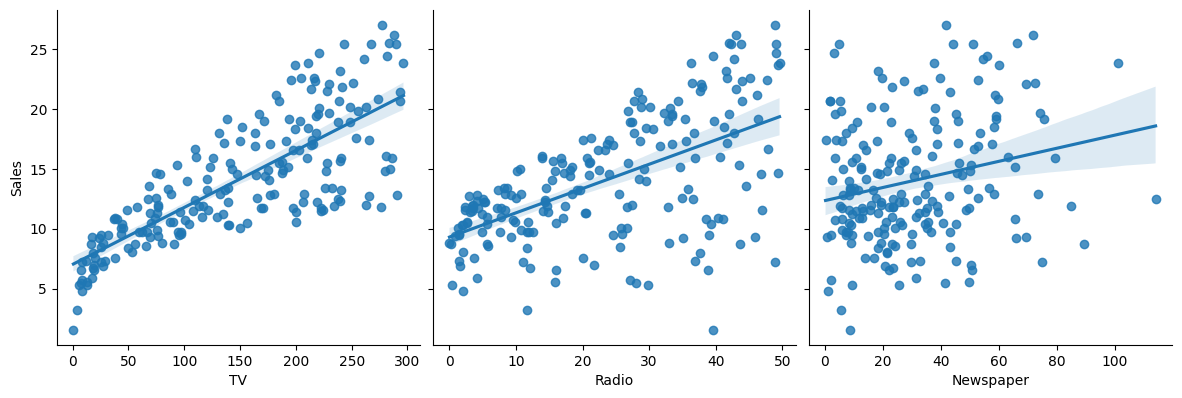

In [157]:
import seaborn as sns

sns.pairplot(
    df1,
    x_vars=['TV', 'Radio', 'Newspaper'],
    y_vars='Sales',
    height=4,
    kind='reg',
)

In [158]:
df1.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot: >

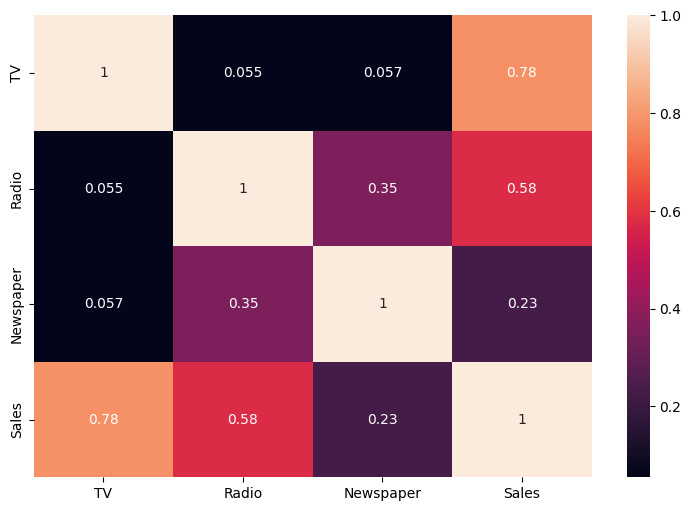

In [161]:
import matplotlib.pyplot as plt

f, ax =plt.subplots(figsize=(9,6))
sns.heatmap(df1.corr(), annot=True, ax=ax)

In [187]:
from sklearn.linear_model import LinearRegression

x = df1[['TV', 'Radio', 'Newspaper']]
y = df1['Sales']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.8, random_state=42) # dividindo os dados

reglin = LinearRegression()
reglin.fit(x, y)

coef = reglin.coef_
coef

reglin.intercept_

2.938889369459412

# FIM